<a href="https://colab.research.google.com/github/fricova/lse_twitter_emotions/blob/main/data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'black-circle-316613'
bucket_name = 'coronatweetsmisha'
!gcloud config set project {project_id}

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey



In [ ]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

In [ ]:
!gsutil cp gs://coronatweetsmisha/PRICE*.csv .

Copying gs://coronatweetsmisha/PRICES_NO_WEEKENDS.csv...
Copying gs://coronatweetsmisha/PRICES_WITH_WEEKENDS.csv...
Copying gs://coronatweetsmisha/PRICE_DIFFERENCES_NO_WEEKENDS.csv...
/ [3 files][210.4 KiB/210.4 KiB]                                                
Operation completed over 3 objects/210.4 KiB.                                    


In [ ]:
import pandas as pd

prices_no_weekends = pd.read_csv("PRICES_NO_WEEKENDS.csv")
prices_with_weekends = pd.read_csv("PRICES_WITH_WEEKENDS.csv")
price_differences_no_weekends = pd.read_csv("PRICE_DIFFERENCES_NO_WEEKENDS.csv")

In [ ]:
prices_no_weekends

,Unnamed: 0,date,anticipation,fear,joy,trust,syuzhet_index,bing_index,nrc_index,bing_index_norm,nrc_index_norm,syuzhet_index_norm,SP500,fear_norm,joy_norm,trust_norm,anticipation_norm,syuzhet_index_z,fear_z,joy_z,anticipation_z,trust_z,nrc_index_z,bing_index_z,weekday
0,2,2020-02-28,0.485801,0.703907,0.281224,0.602122,-0.425539,-0.599669,-0.346609,-0.800205,-0.651246,-0.695493,2954.22,0.793227,-0.113220,-0.037947,0.634220,-3.174923,2.672333,0.430044,1.928683,0.465933,-2.886255,-3.043472,5
1,5,2020-03-02,0.436957,0.617359,0.221443,0.632146,-0.324243,-0.498966,-0.147359,-0.566565,-0.106651,-0.370656,3090.23,0.328403,-0.886903,0.077953,0.282165,-2.175104,1.275395,-1.976391,0.492236,1.114476,-1.329017,-2.315678,1
2,6,2020-03-03,0.473808,0.674835,0.247063,0.583301,-0.336651,-0.503119,-0.244285,-0.576201,-0.371573,-0.410445,3003.37,0.637090,-0.555337,-0.110602,0.547775,-2.297570,2.203092,-0.945099,1.575972,0.059378,-2.086544,-2.345693,2
3,7,2020-03-04,0.475025,0.643650,0.251432,0.569121,-0.314615,-0.510885,-0.229937,-0.594217,-0.332357,-0.339779,3130.12,0.469602,-0.498784,-0.165340,0.556547,-2.080067,1.699740,-0.769200,1.611764,-0.246916,-1.974410,-2.401815,3
4,8,2020-03-05,0.479278,0.649734,0.248655,0.575449,-0.319109,-0.512931,-0.265848,-0.598964,-0.430508,-0.354191,3023.94,0.502277,-0.534732,-0.140911,0.587202,-2.124428,1.797937,-0.881010,1.736844,-0.110221,-2.255066,-2.416603,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,216,2020-09-29,0.442886,0.561427,0.270502,0.586078,-0.071379,-0.090919,0.075395,0.380138,0.502184,0.440235,3335.47,0.028009,-0.251989,-0.099882,0.324902,0.320745,0.372619,-0.001579,0.666608,0.119364,0.411912,0.633319,2
149,217,2020-09-30,0.423321,0.565903,0.272983,0.610541,-0.095622,0.001158,0.099206,0.593766,0.567266,0.362491,3363.00,0.052049,-0.219881,-0.005446,0.183885,0.081457,0.444866,0.098289,0.091234,0.647802,0.598008,1.298775,3
150,218,2020-10-01,0.438175,0.539686,0.298725,0.589078,-0.003546,-0.058103,0.145464,0.456275,0.693699,0.657762,3380.80,-0.088755,0.113271,-0.088301,0.290947,0.990272,0.021706,1.134513,0.528069,0.184171,0.959536,0.870487,4
151,219,2020-10-02,0.453991,0.447291,0.322588,0.680911,-0.006623,0.176253,0.156574,1.000000,0.724066,0.647895,3348.44,-0.584981,0.422097,0.266203,0.404939,0.959904,-1.469604,2.095075,0.993175,2.167869,1.046368,2.564202,5


In [ ]:
date_format = '%Y-%m'

[Text(0, 0.5, 'Closing Price'), Text(0.5, 0, ''), Text(0.5, 1.0, '')]

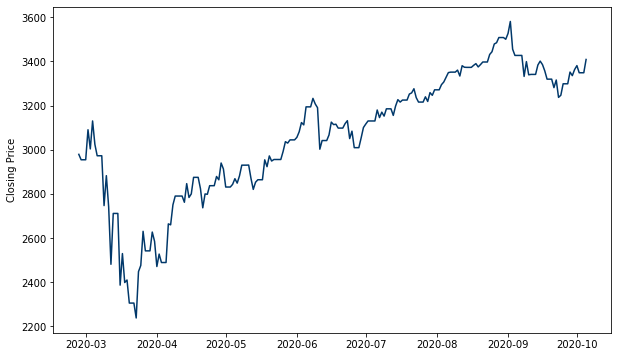

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

fig, ax = plt.subplots(figsize=(10, 6))
dates = pd.to_datetime(prices_with_weekends["date"])
ax.plot(dates, prices_with_weekends["SP500"], c="#01386a")
ax.xaxis.set_major_formatter(DateFormatter(date_format))
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.set(xlabel="",
       ylabel="Closing Price",
       title="")

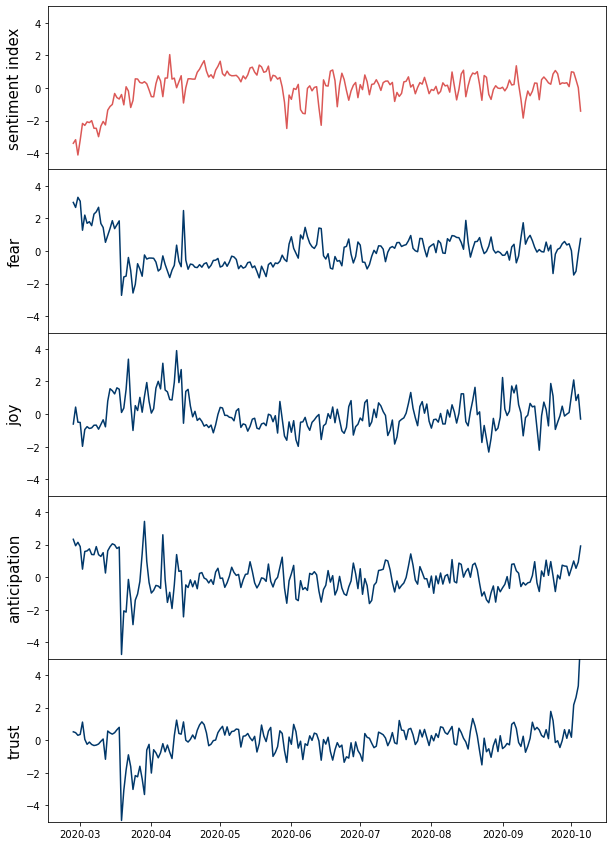

In [ ]:
columns = [
           {"column": "syuzhet_index_z", "color": "#db5856", "label": "sentiment index"},
           {"column": "fear_z", "color": "#01386a", "label": "fear"},
           {"column": "joy_z", "color": "#01386a", "label": "joy"},
           {"column": "anticipation_z", "color": "#01386a", "label": "anticipation"},
           {"column": "trust_z", "color": "#01386a", "label": "trust"}
          ]
fig, axs = plt.subplots(len(columns), figsize=(10, len(columns)*3), sharex=True, gridspec_kw={'hspace': 0})
dates = pd.to_datetime(prices_with_weekends["date"])
for i, column in enumerate(columns):
  axs[i].plot(dates, prices_with_weekends[column["column"]], c=column["color"])
  axs[i].xaxis.set_major_formatter(DateFormatter(date_format))
  axs[i].xaxis.set_major_locator(MonthLocator(interval=1))
  axs[i].set_ylabel(column["label"], fontsize=15)
  axs[i].set_ylim([-5, 5])

In [ ]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

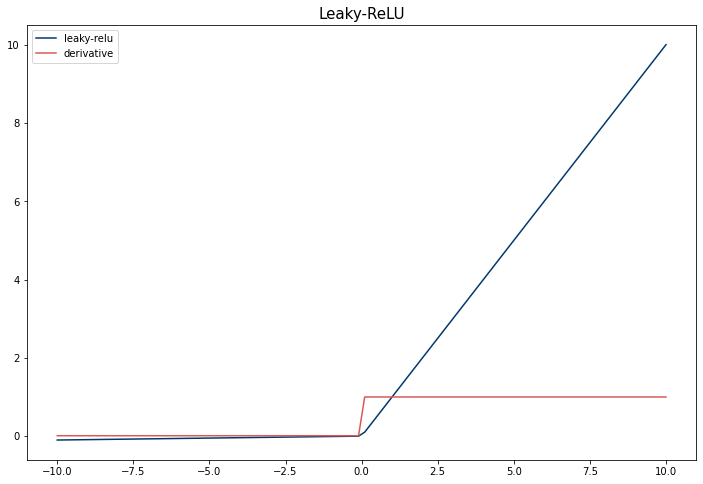

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x):
    return max(0.01*x,x)

def der_leaky_relu(x):
    if x < 0 :
        return 0.01
    if x >= 0 :
        return 1

# Data which will go through activations
x = np.linspace(-10,10,100)
plt.figure(figsize=(12,8))
plt.plot(x, list(map(lambda x: leaky_relu(x),x)), color = "#01386a", label="leaky-relu")
plt.plot(x, list(map(lambda x: der_leaky_relu(x),x)), color = "#db5856", label="derivative")
plt.title("Leaky-ReLU", fontsize = 15)
plt.legend()
plt.show()

In [ ]:
sp500 = prices_with_weekends["SP500"]
sp500 = sp500.values
sp500_zscores = (sp500 - sp500.mean()) / sp500.std()

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, '')]

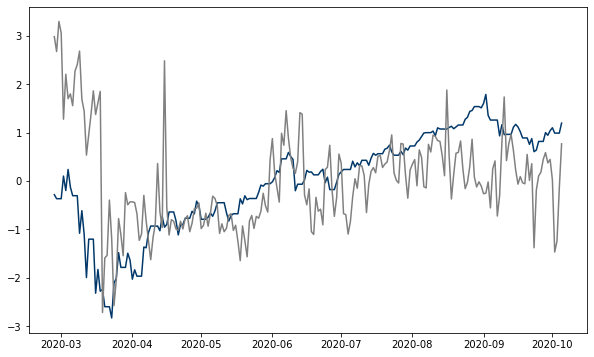

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dates = pd.to_datetime(prices_with_weekends["date"])
ax.plot(dates, sp500_zscores, color = "#01386a")
ax.plot(dates, prices_with_weekends["fear_z"].values, color = "grey")
ax.xaxis.set_major_formatter(DateFormatter(date_format))
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.set(xlabel="",
       ylabel="",
       title="")

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, '')]

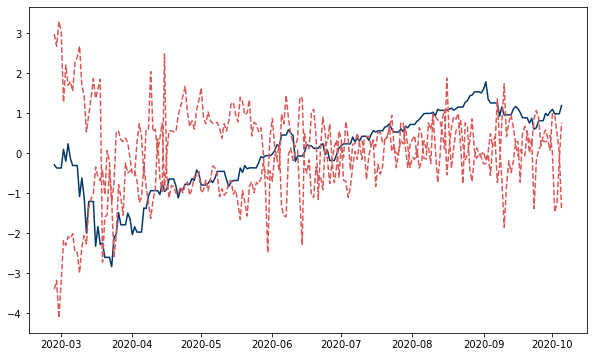

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dates = pd.to_datetime(prices_with_weekends["date"])
ax.plot(dates, sp500_zscores, color = "#01386a")
ax.plot(dates, prices_with_weekends["syuzhet_index_z"].values, linestyle='dashed', color = "#db5856")
ax.plot(dates, prices_with_weekends["fear_z"].values, linestyle='dashed', color = "#db5856")
ax.xaxis.set_major_formatter(DateFormatter(date_format))
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.set(xlabel="",
       ylabel="",
       title="")

In [ ]:
markers = ["2020-03-01"]

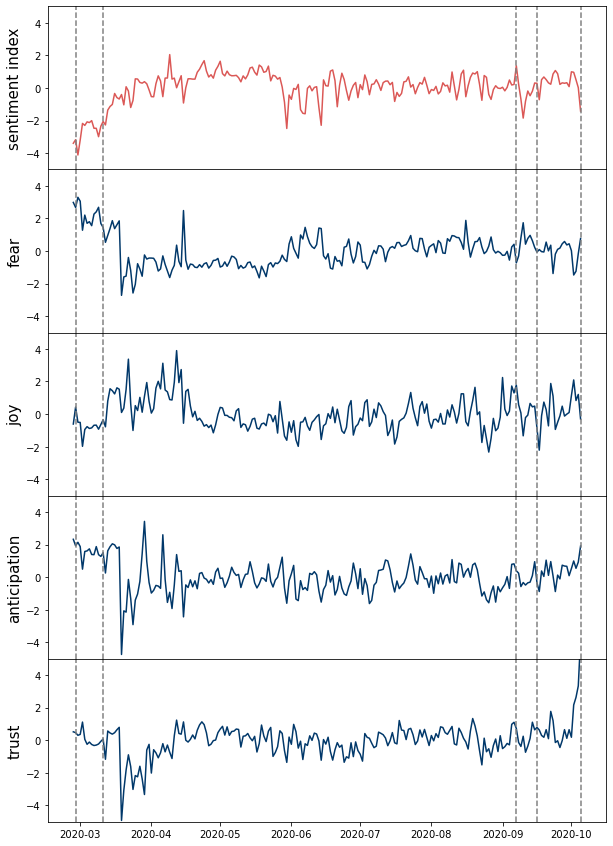

In [ ]:
columns = [
           {"column": "syuzhet_index_z", "color": "#db5856", "label": "sentiment index"},
           {"column": "fear_z", "color": "#01386a", "label": "fear"},
           {"column": "joy_z", "color": "#01386a", "label": "joy"},
           {"column": "anticipation_z", "color": "#01386a", "label": "anticipation"},
           {"column": "trust_z", "color": "#01386a", "label": "trust"}
          ]

markers = ['2020-02-28', '2020-03-11','2020-09-16','2020-10-05']
markers = pd.to_datetime(markers)

fig, axs = plt.subplots(len(columns), figsize=(10, len(columns)*3), sharex=True, gridspec_kw={'hspace': 0})
dates = pd.to_datetime(prices_with_weekends["date"])
for i, column in enumerate(columns):
  axs[i].plot(dates, prices_with_weekends[column["column"]], c=column["color"])
  for marker in markers:
    x = marker
    xpos = dates.tolist().index(x)
    y = prices_with_weekends[column["column"]].values[xpos]
    axs[i].axvline(x=x,ls='--', color='grey')
    # axs[i].plot(x, y, 'ro', markersize=7)
  axs[i].xaxis.set_major_formatter(DateFormatter(date_format))
  axs[i].xaxis.set_major_locator(MonthLocator(interval=1))
  axs[i].set_ylabel(column["label"], fontsize=15)
  axs[i].set_ylim([-5, 5])